In [26]:
import pandas as pd

In [27]:
Data = pd.read_csv(r"D:\ALGORITMO RECLUTADOR\Todo el proyecto\Data Posición\Porteros.csv")

In [28]:
pd.set_option('display.max_columns', None)
Data.head()

,Name,Interceptions,Penalty committed,Clearances,Errors lead to goal,Dribbled past,Total passes,Accurate passes %,Accurate long balls %,Saves,Clean sheets,Penalties faced,Penalties saved,Goals conceded inside the box,Goals conceded outside the box,Yellow cards,Red cards,Aerial duels won %,Total duels won %,Appearances,Age Range,Position,League,Level
0,Karim Emad,0.0,0.00,3.50,0.0,0.00,31.50,33.33,26.32,5.00,0.00,0.50,0.00,1.00,0.0,0.50,0.00,100.00,100.00,2,2,1,Egipto Premier League,4
1,Abdelrahman Samir,0.0,0.00,0.50,0.0,0.00,28.00,57.14,31.43,3.00,0.50,0.00,0.00,1.00,0.0,0.50,0.00,0.00,100.00,2,1,1,Egipto Premier League,4
2,Essam Tharwat,0.0,0.00,1.14,0.0,0.14,21.79,53.77,40.17,3.07,0.43,0.14,0.00,0.79,0.0,0.07,0.00,66.67,73.68,14,3,1,Egipto Premier League,4
3,Mohamed El-Shenawy,0.0,0.03,0.66,0.0,0.00,21.86,66.40,43.45,2.28,0.59,0.14,0.07,0.45,0.0,0.07,0.03,100.00,92.31,29,3,1,Egipto Premier League,4
4,Ali Lotfi,0.0,0.00,0.20,0.0,0.00,13.80,85.51,65.38,1.00,0.60,0.00,0.00,0.00,0.0,0.00,0.00,0.00,100.00,5,3,1,Egipto Premier League,4


In [29]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

Columna_habilidades = Data.columns.drop(["Name", "League"])

features = Data[Columna_habilidades]

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)

# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=6, algorithm = "auto")  # Buscamos 6 vecinos porque uno de ellos será el jugador mismo

# Ajusta el modelo a tus datos
model.fit(features_scaled)

NearestNeighbors(n_neighbors=6)

In [30]:
Data.columns

Index(['Name', 'Interceptions', 'Penalty committed', 'Clearances',
       'Errors lead to goal', 'Dribbled past', 'Total passes',
       'Accurate passes %', 'Accurate long balls %', 'Saves', 'Clean sheets',
       'Penalties faced', 'Penalties saved', 'Goals conceded inside the box',
       'Goals conceded outside the box', 'Yellow cards', 'Red cards',
       'Aerial duels won %', 'Total duels won %', 'Appearances', 'Age Range',
       'Position', 'League', 'Level'],
      dtype='object')

In [31]:
caracteristicas_grafico = ['Saves', 'Clean sheets', 'Total duels won %', 'Penalties saved', 'Goals conceded inside the box', 'Goals conceded outside the box', 'Accurate long balls %']

In [35]:
# Lista de columnas para mediana de negativos
columnas_negativos = ['Penalty committed', 'Errors lead to goal', 'Dribbled past', 
                      'Goals conceded inside the box', 'Goals conceded outside the box', 
                      'Yellow cards', 'Red cards']

# Lista de columnas para mediana de positivos
columnas_positivos = ['Interceptions', 'Clearances', 
                      'Total passes', 'Accurate passes %',
                      'Accurate long balls %', 'Saves', 'Clean sheets', 
                      'Aerial duels won %', 'Total duels won %']

# Calcular la mediana por fila para el conjunto de columnas 'columnas_negativos'
mediana_negativos = Data[columnas_negativos].apply(lambda row: row.median(), axis=1)

# Calcular la mediana por fila para el conjunto de columnas 'columnas_positivos'
mediana_positivos = Data[columnas_positivos].apply(lambda row: row.median(), axis=1)

# Estas son tus medianas por fila para cada conjunto de columnas

diferencia_medianas = mediana_positivos - mediana_negativos

diferencia_medianas

0       26.32
1        3.00
2       21.79
3       21.83
4        1.00
        ...  
1766     0.00
1767     4.00
1768     1.50
1769     1.00
1770    24.00
Length: 1771, dtype: float64

In [36]:
diferencia_medianas.min()

-1.0

In [ ]:
# Calculando la mediana de las columnas de interés, excluyendo 'Name' y 'League'
Data['mediana'] = Data.drop(['Name', 'League'], axis=1).median(axis=1)
Data['mediana']

0       1.000
1       0.500
2       0.895
3       0.625
4       0.100
        ...  
1766    0.000
1767    0.500
1768    0.500
1769    0.500
1770    1.000
Name: mediana, Length: 1771, dtype: float64

In [ ]:
Data['mediana'].describe()

count    1771.000000
mean        0.714653
std         0.320817
min         0.000000
25%         0.515000
50%         0.800000
75%         0.950000
max         1.500000
Name: mediana, dtype: float64

In [ ]:
import unicodedata
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Función para normalizar nombres (ignorar mayúsculas y acentos)
def normalizar_nombre(nombre):
    nombre = nombre.lower()
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode("utf-8")
    return nombre

def buscar_jugadores_similares(nombre, caracteristicas_grafico):
    # Normaliza el nombre que buscas
    nombre_normalizado = normalizar_nombre(nombre)

    # Aplica la normalización a los nombres en el conjunto de datos
    Data['Name_Normalized'] = Data['Name'].apply(normalizar_nombre)

    # Busca el jugador con el nombre normalizado
    jugador = Data[Data['Name_Normalized'] == nombre_normalizado]

    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        jugador_scaled = scaler.transform(jugador[features.columns])
        distancias, indices = model.kneighbors(jugador_scaled)
        jugadores_similares = Data.iloc[indices[0][1:]]  # Excluimos el primer resultado porque será el jugador mismo

        # Escala todas las características de los jugadores similares
        jugadores_similares_scaled = scaler.transform(jugadores_similares[features.columns])

        # Define una lista de colores
        colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

        # Crea un gráfico de radar para cada jugador similar
        fig = go.Figure()
        for i, row in enumerate(jugadores_similares_scaled):
            color = colores[i % len(colores)]  # Elige un color de la lista
            fig.add_trace(go.Scatterpolar(
                r=row[features.columns.isin(caracteristicas_grafico)],
                theta=caracteristicas_grafico,
                fill='toself',
                name=jugadores_similares.iloc[i]['Name'],
                line=dict(color=color)
            ))

        fig.update_layout(
            autosize=False,
            width=800,
            height=800,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-2, 10]  # Ajusta este rango según tus datos
                )),
            showlegend=True
        )
        fig.show()

        # Crea un gráfico de dispersión para la mediana
        plt.figure(figsize=(10, 6))
        for i, name in enumerate(jugadores_similares['Name']):
            plt.scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'mediana'],
                        color=colores[i % len(colores)], marker='o')
        for line in [1.50, 0.75, 0.01]:
            plt.axhline(y=line, color='r', linestyle='--')
        plt.title('Mediana de los jugadores similares')
        plt.xticks(range(len(jugadores_similares)), jugadores_similares['Name'], rotation=360)
        plt.xlabel('Jugadores')
        plt.ylabel('Mediana')
        plt.show()

        return jugadores_similares

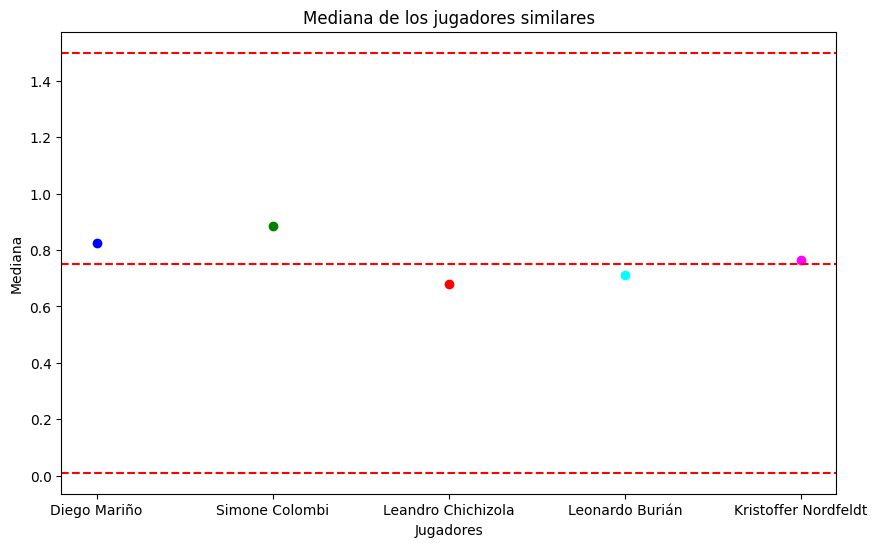

,Name,Interceptions,Penalty committed,Clearances,Errors lead to goal,Dribbled past,Total passes,Accurate passes %,Accurate long balls %,Saves,Clean sheets,Penalties faced,Penalties saved,Goals conceded inside the box,Goals conceded outside the box,Yellow cards,Red cards,Aerial duels won %,Total duels won %,Appearances,Age Range,Position,League,Level,mediana,Name_Normalized
743,Diego Mariño,0.00,0.0,0.65,0.12,0.12,25.59,67.82,44.22,2.29,0.24,0.00,0.0,1.06,0.12,0.00,0.0,75.00,62.50,17,3,1,La Liga 2,2,0.825,diego marino
1120,Simone Colombi,0.00,0.0,0.81,0.00,0.04,24.31,69.46,44.08,2.38,0.38,0.15,0.0,0.96,0.12,0.08,0.0,100.00,93.33,26,3,1,Italia Serie B,2,0.885,simone colombi
1121,Leandro Chichizola,0.00,0.0,0.71,0.06,0.12,28.18,61.38,40.13,1.94,0.41,0.12,0.0,0.65,0.12,0.12,0.0,83.33,72.73,17,3,1,Italia Serie B,2,0.680,leandro chichizola
1756,Leonardo Burián,0.05,0.0,0.68,0.00,0.05,23.00,68.19,45.20,1.95,0.32,0.11,0.0,0.74,0.11,0.05,0.0,88.89,80.00,19,3,1,LPFArgentina,2,0.710,leonardo burian
487,Kristoffer Nordfeldt,0.03,0.0,0.53,0.10,0.07,26.03,69.91,40.63,2.77,0.30,0.07,0.0,1.03,0.23,0.07,0.0,100.00,77.78,30,3,1,Suecia Allsvenskan,3,0.765,kristoffer nordfeldt


In [ ]:
buscar_jugadores_similares('GaBriEl AriAs', caracteristicas_grafico)